Template Matching - Simplest form of object detection. It simply scans a larger image for a provided template by sliding the template target image across the larger image

# Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Template Matching

In [2]:
full = cv2.imread('Images/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

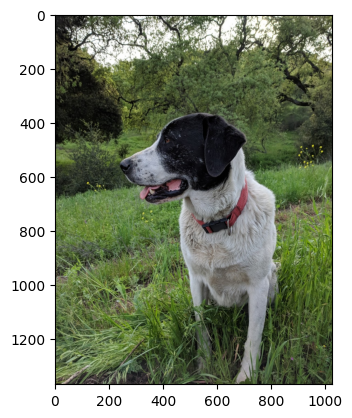

In [3]:
plt.imshow(full)

In [4]:
face = cv2.imread('Images/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

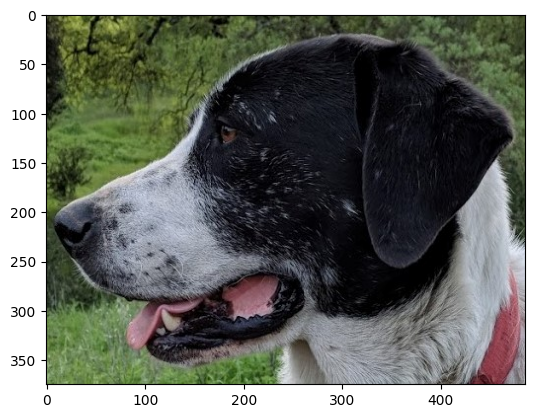

In [5]:
plt.imshow(face)

In [6]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

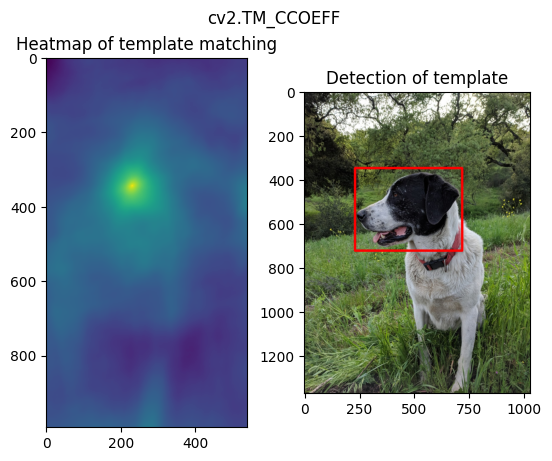

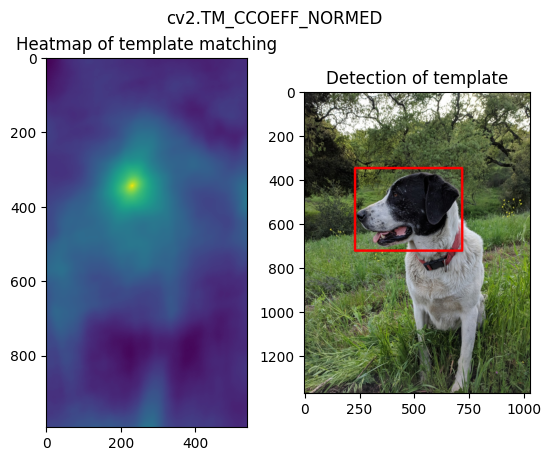

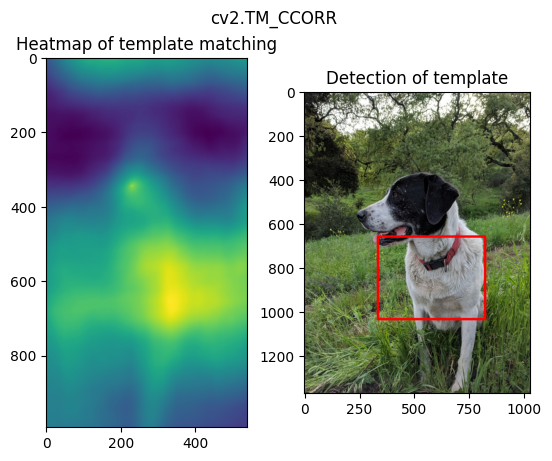

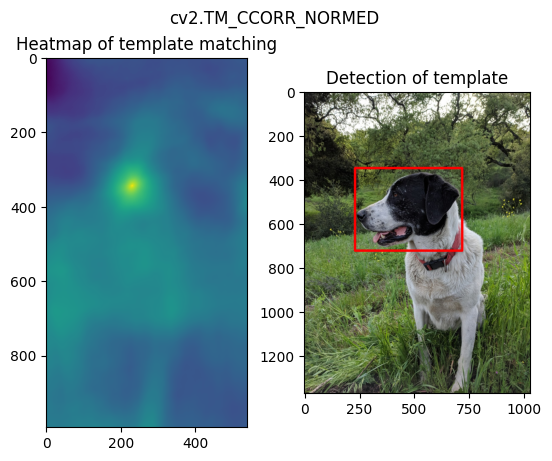

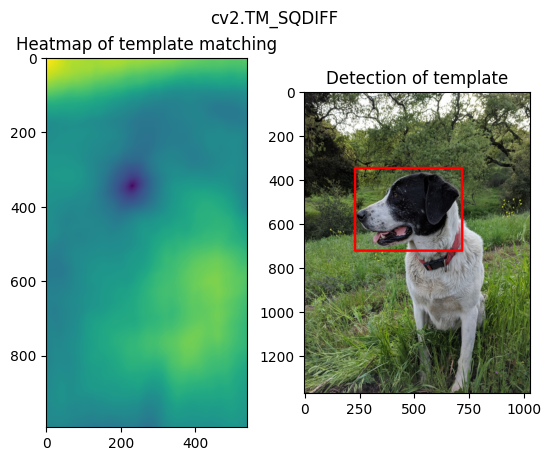

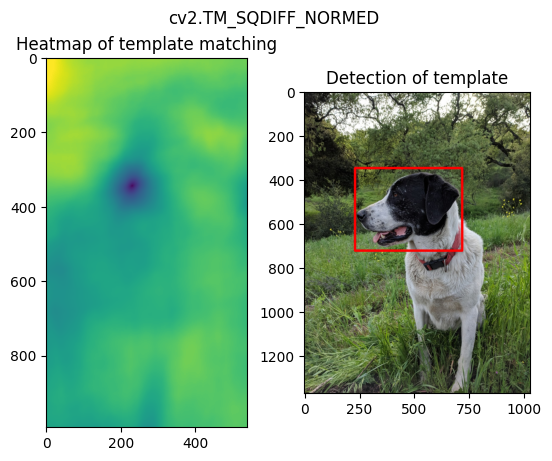

In [8]:
for m in methods:
    full_copy = full.copy()

    method = eval(m)

    res = cv2.matchTemplate(full_copy, face, method=method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        topLeft = min_loc
    else:
        topLeft = max_loc

    height, width, channels = face.shape

    bottomRight = (topLeft[0] + width, topLeft[1] + height)

    cv2.rectangle(full_copy, topLeft, bottomRight, (255,0,0), 10)

    plt.subplot(121)
    plt.imshow(res)
    plt.title('Heatmap of template matching')
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection of template')
    plt.suptitle(m)

    plt.show()
    print('\n')
    print('\n')

# Corner Detection

* Harris Corner Detection - basic intuition is that corners can be detected by looking for significant change in all directions.
* Shi-Tomasi Corner Detection - It changes the scoring function selection criteria that Harris uses for corner detection.

In [9]:
flat_chess = cv2.imread('Images/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

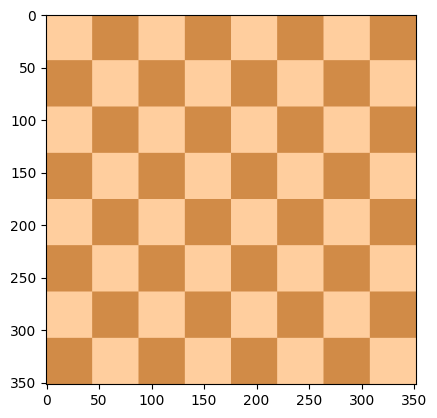

In [10]:
plt.imshow(flat_chess)

In [11]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

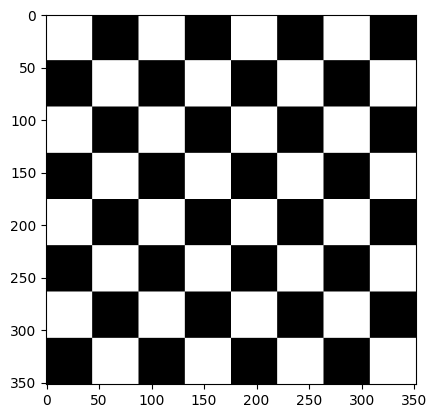

In [12]:
plt.imshow(gray_flat_chess, cmap='gray')

In [13]:
real_chess = cv2.imread('Images/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

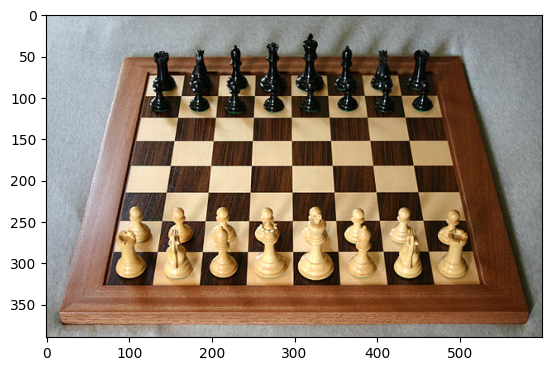

In [14]:
plt.imshow(real_chess)

In [15]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)

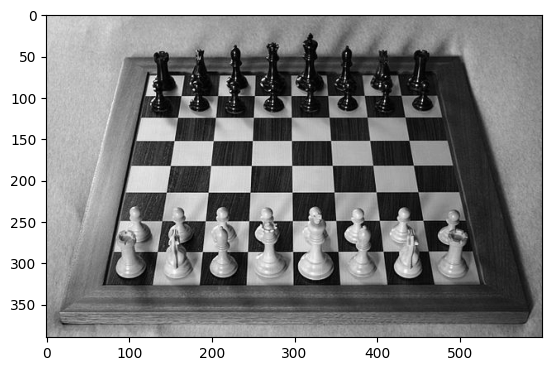

In [16]:
plt.imshow(gray_real_chess, cmap='gray')

In [17]:
gray = np.float32(gray_flat_chess)

In [18]:
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

In [19]:
dst = cv2.dilate(dst, None)

In [20]:
flat_chess[dst>0.01*dst.max()] = [255, 0, 0]

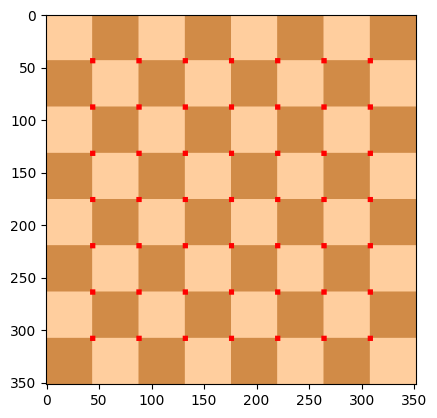

In [21]:
plt.imshow(flat_chess)

In [22]:
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

In [23]:
dst = cv2.dilate(dst, None)

In [24]:
real_chess[dst>0.01*dst.max()] = [255, 0, 0]

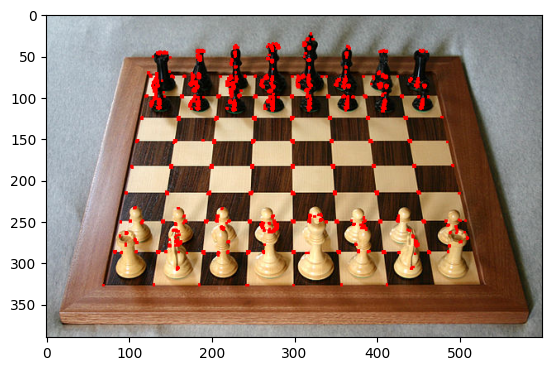

In [25]:
plt.imshow(real_chess)